The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

Input variables (based on physicochemical tests):
1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dio 
7 - total sulfur dioxide 
8 - density 
9 - pH 


r2, RMSE, and MAE of your model
See if you can improve the model using lasso regression, what alpha gives best results?
See if you can improve the model using ridge regression, what alpha gives best results?
Any other way to improve the results?


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline

In [81]:
df_wine=pd.read_csv('winequality-red.csv')

In [82]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [83]:
corr = df_wine.corr()

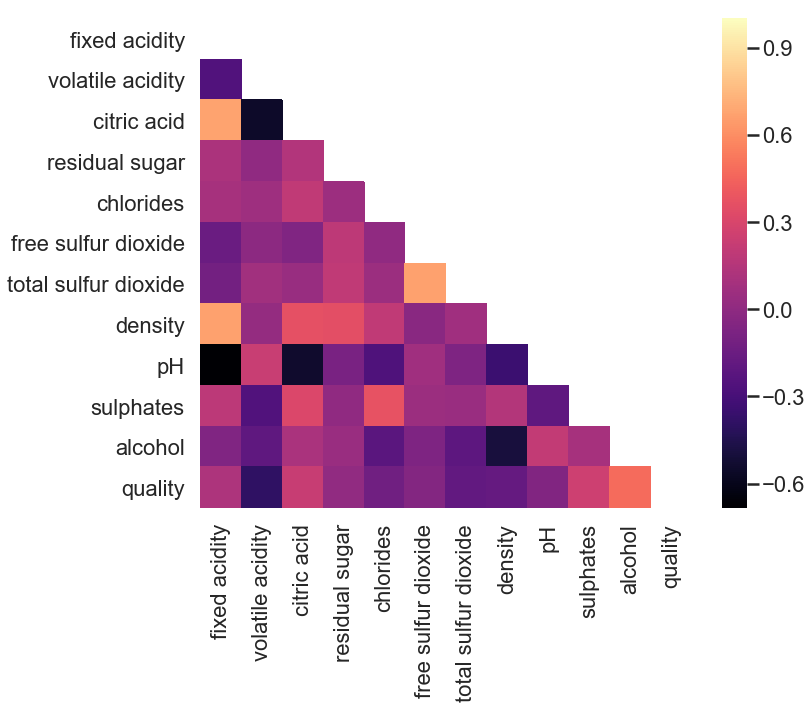

In [84]:
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f, ax = plt.subplots(figsize = (11,9))

sns.heatmap(corr,mask=mask,cmap='magma')

In [37]:
def meas_perf(name,actual,predicted):
    r2_name = r2_score(actual, predicted) * 100
    mae_name = mean_absolute_error(actual, predicted)
    mse_name = mean_squared_error(actual, predicted) 
    rmse_name = np.sqrt(mean_squared_error(actual, predicted))
    
    print(("r2_%s: %.2f") %(name, r2_name))
    print(("mae_%s: %.2f") %(name, mae_name))
    print(("mse_%s: %.2f") %(name, mse_name))
    print(("rmse_%s: %.2f") %(name, rmse_name))

In [85]:
df_train, df_test = train_test_split(df_wine,test_size=0.30, random_state=30)
y_train = df_train['quality']
x_train = df_train[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','alcohol','sulphates']]

y_test = df_test['quality']
x_test = df_test[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','alcohol','sulphates']]

linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_predict = linreg.predict(x_test)

meas_perf('linreg',y_test,y_predict)

r2_linreg: 36.53
mae_linreg: 0.51
mse_linreg: 0.43
rmse_linreg: 0.65


In [86]:
pd.DataFrame(linreg.coef_, index=x_train.columns)

,0
fixed acidity,0.017223
volatile acidity,-0.985383
citric acid,0.101691
residual sugar,0.021344
chlorides,-1.718651
free sulfur dioxide,0.004244
total sulfur dioxide,-0.003489
density,-22.592013
pH,-0.376398
alcohol,0.263990


In [95]:
r2score=0
for alpha in range(1,101,1):
    alpha=alpha/100
    lasso = Lasso(alpha=alpha,random_state=30)
    lasso.fit(x_train, y_train)
    lasso_predict = lasso.predict(x_test)
    r2=r2_score(y_test,lasso_predict)*100
    if r2>r2score:
        r2score=r2
        a=alpha
    else:
        continue
print('lasso_alpha: ',a)
print('lasso_r2:',r2score)

lasso_alpha:  0.01
lasso_r2: 34.597277682699314


In [99]:
r2score=0
for alpha in range(1,101,1):
    alpha=alpha/100
    ridge = Ridge(alpha=alpha,random_state=30)
    ridge.fit(x_train, y_train)
    ridge_predict = ridge.predict(x_test)
    r2=r2_score(y_test,ridge_predict)*100
    if r2>r2score:
        r2score=r2
        a=alpha
    else:
        continue
print('ridge_alpha: ',a)
print('ridge_r2:',r2score)

ridge_alpha:  0.01
ridge_r2: 36.54329967587627


In [100]:
#4. Any other way to improve the results?
"""Use a polynomial model. independent variables should consider duration and not just chemical content. Consider removing outliers.
The scale of the quality should be bigger because of it's small range, quality is harder to finetune to the right qualities."""

"Use a polynomial model. remove variables that show multi-collinearity. Consider removing outliers.\nThe scale of the quality should be bigger because of it's small range, quality is harder to finetune to the right qualities."